## Data loading

### Subtask:
Load the data from "MSFT_1.csv" into a pandas DataFrame.


In [1]:
import pandas as pd

df = pd.read_csv('MSFT_1.csv')
print(df.shape)
display(df.head())

(4858, 7)


,Company,Date,Close,Volume,Inflation_Index,CPI,GDP
0,MSFT,7/1/03,27.900000,80517400,1.64,183.9,11566.669
1,MSFT,8/1/03,27.120001,64566000,2.04,184.6,11566.669
2,MSFT,10/1/03,27.959999,67730200,2.00,185.0,11772.234
3,MSFT,1/13/03,28.195000,60817800,1.77,181.7,11174.129
4,MSFT,1/14/03,28.485001,54206400,1.76,181.7,11174.129


## Data exploration

### Subtask:
Explore the loaded data to understand its structure and characteristics.


**Reasoning**:
Examine the data shape, inspect data types, generate descriptive statistics, check for missing values, and understand the distribution of numerical data.



In [2]:
print(df.shape)
print(df.dtypes)
print(df.describe())
print(df.isnull().sum())
# For numerical data distribution, we can use histograms and box plots, but since we are only exploring the data, we can skip this part.

(4858, 7)
Company             object
Date                object
Close              float64
Volume               int64
Inflation_Index    float64
CPI                float64
GDP                float64
dtype: object
             Close        Volume  Inflation_Index          CPI           GDP
count  4858.000000  4.858000e+03      4858.000000  4858.000000   4858.000000
mean    100.579322  4.641926e+07         2.088919   237.182141  18285.748097
std     114.443461  2.884797e+07         0.401212    34.602367   4864.453388
min      15.150000  7.164500e+06         0.040000   181.700000  11174.129000
25%      27.170000  2.605618e+07         1.840000   212.709000  14608.209000
50%      37.255001  3.996800e+07         2.190000   233.877000  17192.019000
75%     133.255001  5.913140e+07         2.360000   256.143000  21111.600000
max     467.559998  5.910522e+08         3.020000   315.664000  29700.580000
Company            0
Date               0
Close              0
Volume             0
Inflation_

**Reasoning**:
Explore categorical columns (if applicable) by analyzing unique values and their frequencies. In this case, we only have 'Company' and 'Date' as potential categorical columns.



In [3]:
print(df['Company'].unique())
print(df['Company'].value_counts())
print(df['Date'].unique())
print(df['Date'].value_counts())

['MSFT']
Company
MSFT    4858
Name: count, dtype: int64
['7/1/03' '8/1/03' '10/1/03' ... '12/27/24' '12/30/24' '12/31/24']
Date
12/31/24    1
7/1/03      1
8/1/03      1
10/1/03     1
1/13/03     1
           ..
1/29/03     1
1/28/03     1
1/27/03     1
1/24/03     1
1/23/03     1
Name: count, Length: 4858, dtype: int64


## Data visualization

### Subtask:
Visualize the distribution of numerical features and the correlation matrix of the data.


**Reasoning**:
Visualize the distribution of numerical features using histograms and box plots, and create a heatmap of the correlation matrix.



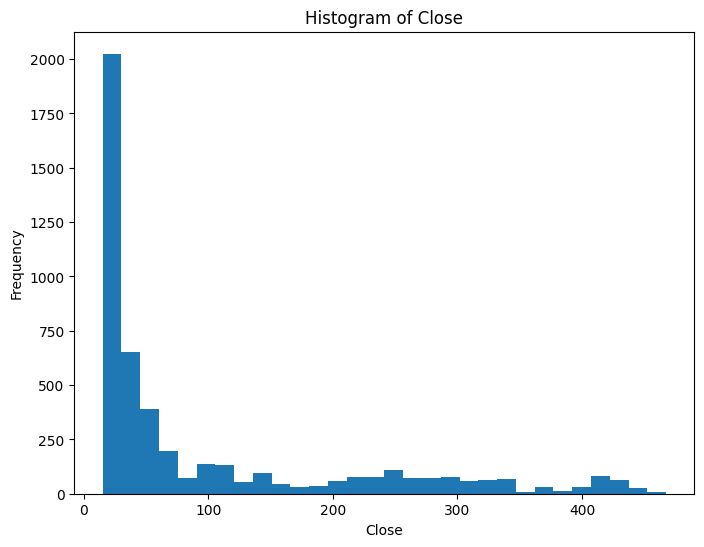

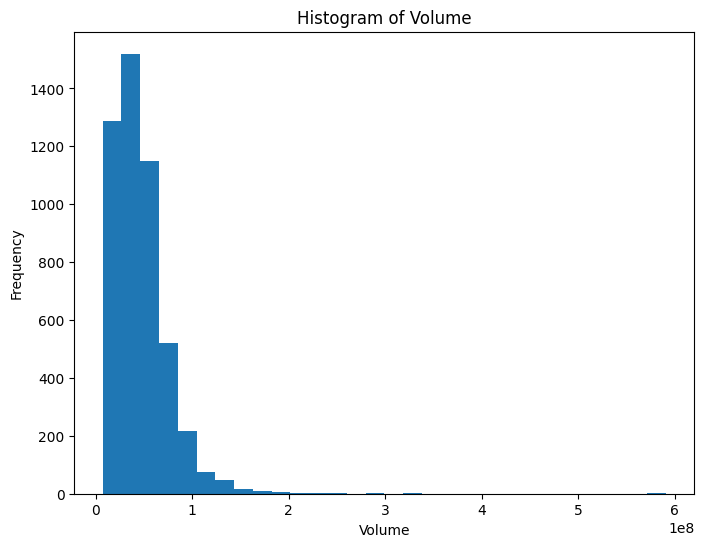

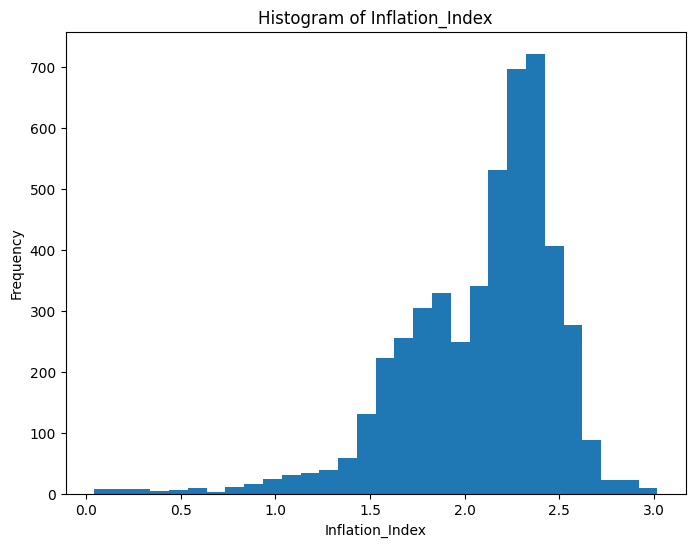

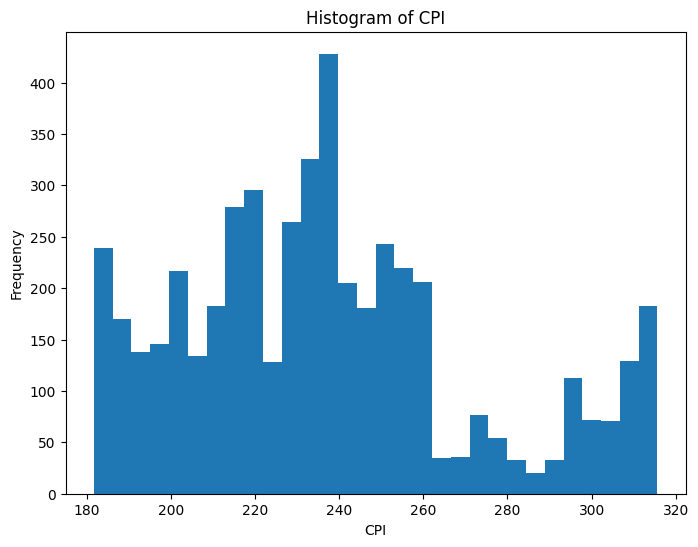

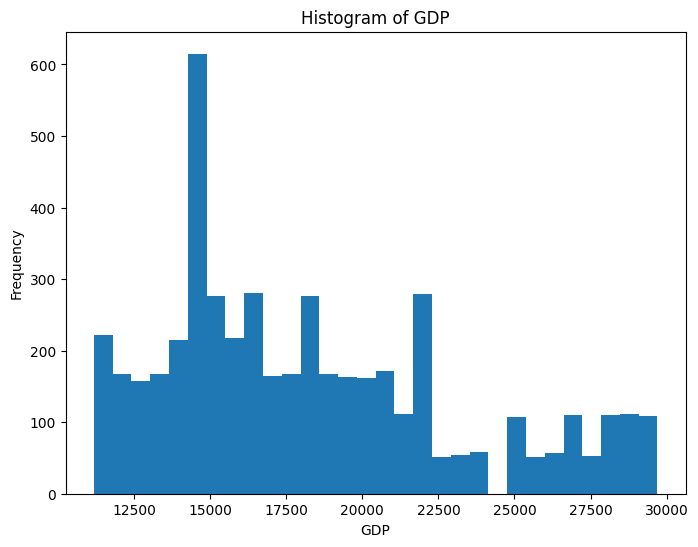

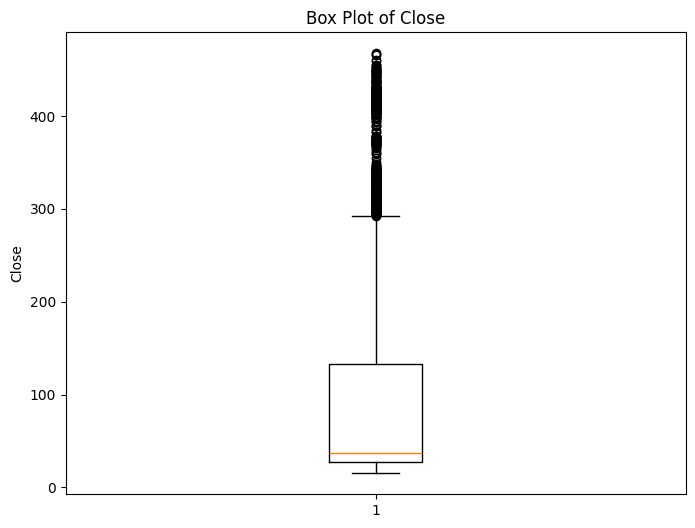

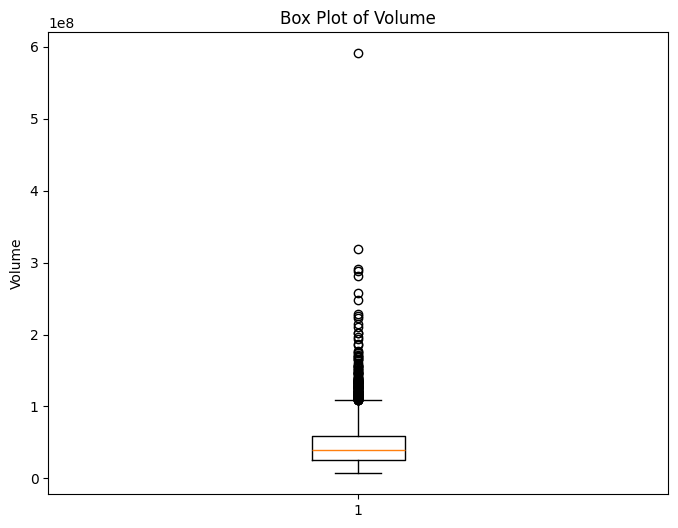

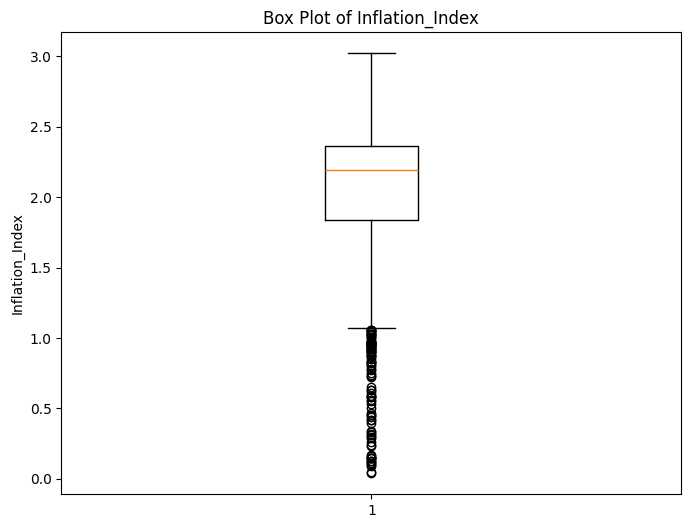

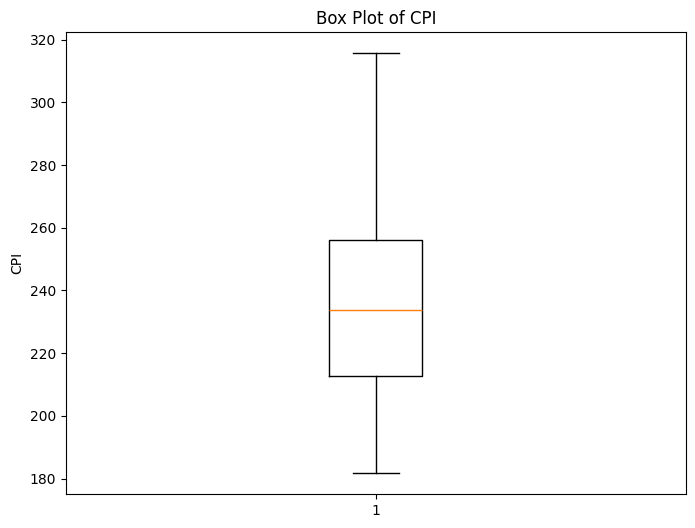

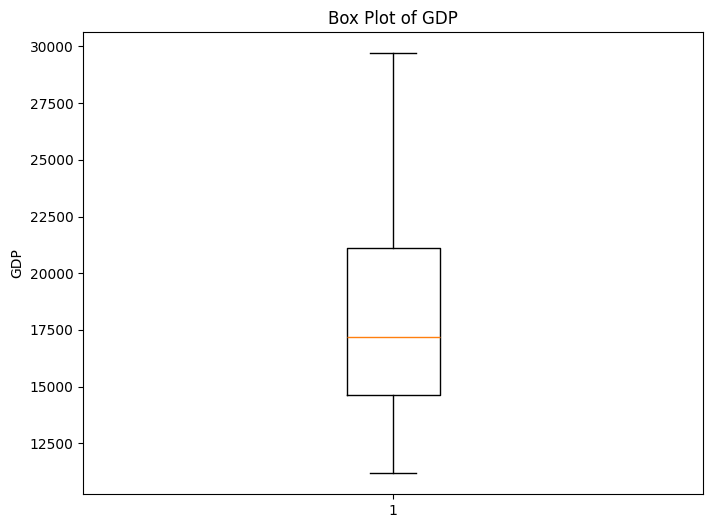

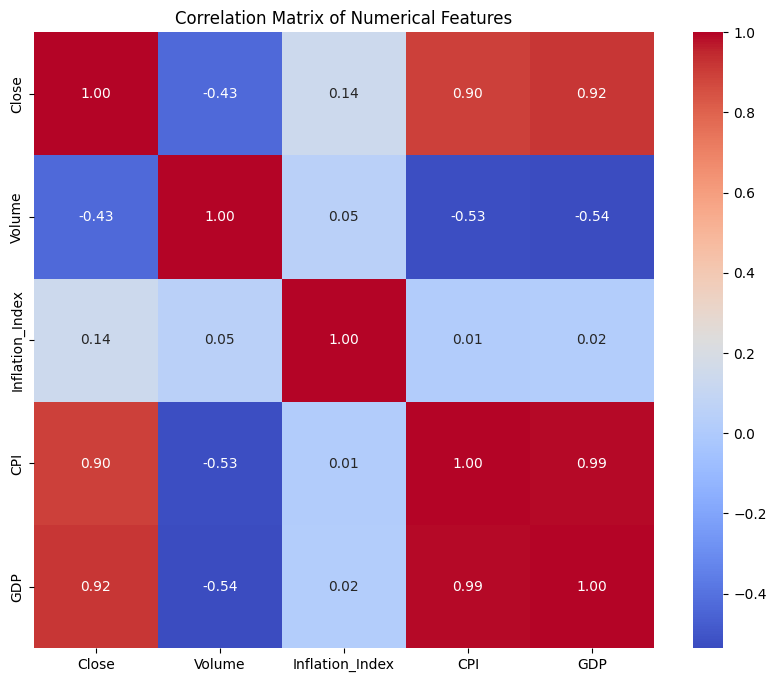

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for numerical features
numerical_features = ['Close', 'Volume', 'Inflation_Index', 'CPI', 'GDP']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=30)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()

# Create box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature])
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature}')
    plt.show()

# Create a heatmap of the correlation matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data analysis

### Subtask:
Analyze the correlation matrix to identify potential multicollinearity issues.


**Reasoning**:
Calculate the correlation matrix for numerical features and identify highly correlated pairs.



In [5]:
# Calculate the correlation matrix for numerical features
numerical_features = ['Close', 'Volume', 'Inflation_Index', 'CPI', 'GDP']
correlation_matrix = df[numerical_features].corr()

# Identify pairs of variables with a correlation coefficient above 0.8
threshold = 0.8
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
  for j in range(i + 1, len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i, j]) > threshold:
      highly_correlated_pairs.append(
          (correlation_matrix.columns[i], correlation_matrix.columns[j],
           correlation_matrix.iloc[i, j]))

# Print the highly correlated pairs
print("Highly correlated pairs:")
for pair in highly_correlated_pairs:
  print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Highly correlated pairs:
Close and CPI: 0.8952127094890385
Close and GDP: 0.9187008190460219
CPI and GDP: 0.992323042090994


## Summary:

### 1. Q&A

* **Are there any multicollinearity issues in the data?**
Yes, there are multicollinearity issues. The analysis identified several pairs of variables with high correlation coefficients, including "Close" and "CPI" (0.895), "Close" and "GDP" (0.919), and "CPI" and "GDP" (0.992).


### 2. Data Analysis Key Findings

* **High Correlation between "Close" and "CPI/GDP":**  "Close" has a strong positive correlation with both "CPI" (0.895) and "GDP" (0.919).
* **High Correlation between "CPI" and "GDP":** "CPI" and "GDP" are highly correlated with a coefficient of 0.992.
* **Potential Multicollinearity:** These high correlations suggest that there might be multicollinearity issues in the data, meaning that these variables might be providing redundant information.


### 3. Insights or Next Steps

* **Address Multicollinearity:**  Consider strategies to address the identified multicollinearity, such as removing one of the correlated variables or using techniques like Principal Component Analysis (PCA) to reduce dimensionality.
* **Further Analysis with VIF:** Calculate Variance Inflation Factors (VIF) to quantify the severity of multicollinearity and guide the selection of appropriate strategies for handling it.
